## Understanding the Data

This is telco churn data

**Target**

Churn — Whether the customer churned or not (Yes or No)


**Feature**

PhoneService 

MultipleLines 

InternetService 

OnlineSecurity 

OnlineBackup 

DeviceProtection 

TechSupport 

StreamingTV 

StreamingMovies 

Customer account information

Tenure 

Contract 

PaperlessBilling 

PaymentMethod 

MonthlyCharges 

TotalCharges

customerID 

Gender

SeniorCitizen 

Partner

Dependents

**New Variable**

I will create a new variable, namely total_service, to catch the idea, whether adding more services could trigger churn


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
#load data
df = pd.read_csv('/content/telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Data Preprocessing

Check the missing value and duplicates

In [ ]:
df.info() # no missing value
# note: total charges is actually numeric but stored as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
# double check missing value
df.isna().sum() 

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
# check totalcharges that is numeric but stored as string
df.value_counts('totalcharges') 
# we found 11 empty string which caused a failure when transforming data
# since 11 is insignificant, we can drop the missing value

totalcharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
260.8       1
260.7       1
2599.95     1
2598.95     1
999.9       1
Length: 6531, dtype: int64

In [ ]:
(df['totalcharges'].values == ' ').sum() # next time, when trying to convert string to float and it fails, assume there is empty string by using this

11

In [ ]:
# drop missing values in totalcharges
df_missingval = (df[df['totalcharges']==' '].index.values)
df = df.drop(index = df_missingval)
df.index.size # our new observation

7032

In [ ]:
# transform total charge from string to float
df['totalcharges'] = df['totalcharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [ ]:
# check duplicate
df.duplicated().sum() # no duplicate

0

In [ ]:
df=df.dropna()

## Exploratory data analysis (EDA) with data visualization

Data visualization helps to understand why customers stops using the service. Steps in this process are:


1.   Deep dive to understand the data
2.   Visualize demography and service variables against churn

In [ ]:
df['churn'].value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

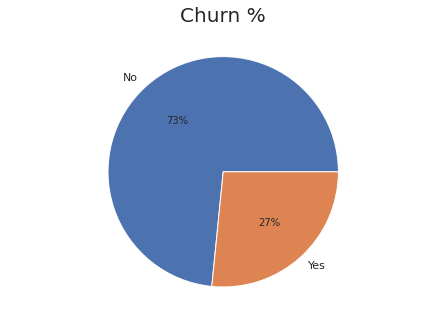

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Churn %", fontsize=20)
plt.show()

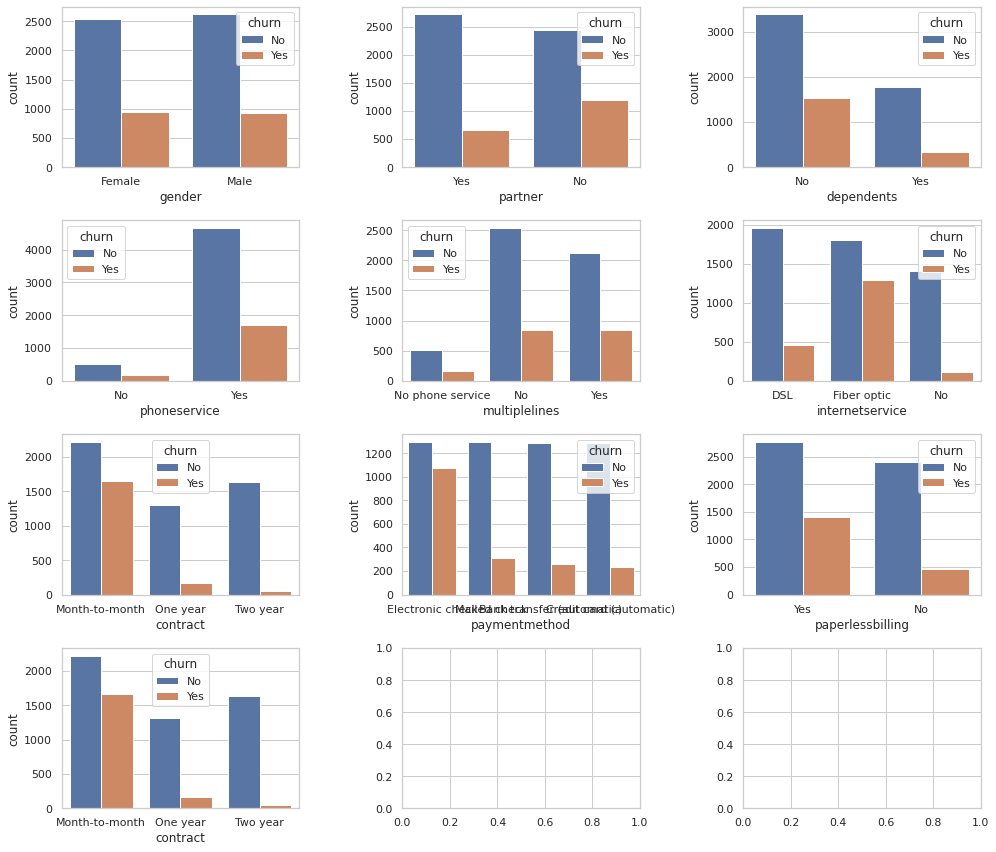

In [ ]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(4, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='churn', ax=ax[0][0])
sns.countplot(data=df, x='partner', hue='churn', ax=ax[0][1])
sns.countplot(data=df, x='dependents', hue='churn', ax=ax[0][2])
sns.countplot(data=df, x='phoneservice', hue='churn', ax=ax[1][0])
sns.countplot(data=df, x='multiplelines', hue='churn', ax=ax[1][1])
sns.countplot(data=df, x='internetservice', hue='churn', ax=ax[1][2])
sns.countplot(data=df, x='contract', hue='churn', ax=ax[2][0])
sns.countplot(data=df, x='paymentmethod', hue='churn', ax=ax[2][1])
sns.countplot(data=df, x='paperlessbilling', hue='churn', ax=ax[2][2])
sns.countplot(data=df, x='contract', hue='churn', ax=ax[3][0])

plt.tight_layout()
plt.show()
# from these bar, it seems customers who stop using the service are: 
# not in a relationship, single, has contract in month-to-basis with paperless billing

In [ ]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
cats=['gender','partner', 'dependents', 'seniorcitizen']
service=['phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
nums=['tenure', 'monthlycharges', 'totalcharges']

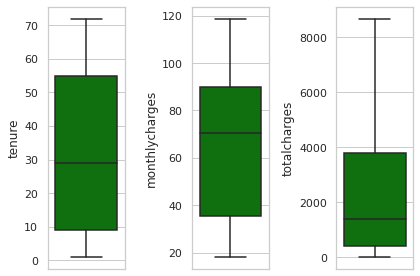

In [ ]:
# Univariate analysis
# Boxplot to check dispersment and outliers
features = nums
for i in range (0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green')
  plt.tight_layout()
  # ANALYSIS:
  # No outliers apparently

<Figure size 864x432 with 0 Axes>

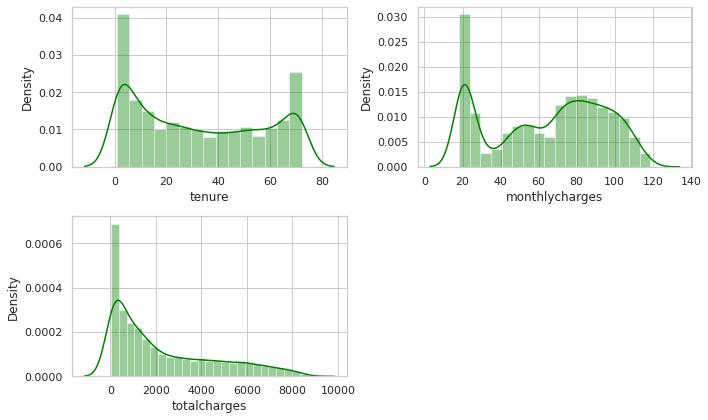

In [ ]:
# Univariate analysis
# KDE plot to check the distribution
plt.figure(figsize=(12,6))

features = nums
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
  plt.subplot(2, len(features)//2 + 1, i+1)
  sns.distplot(x=df[features[i]], color='green')
  plt.xlabel(features[i])
  plt.tight_layout()

# ANALYSIS
# a. The variables are not normally distributed/positively skewed and two variables have more than one peaks

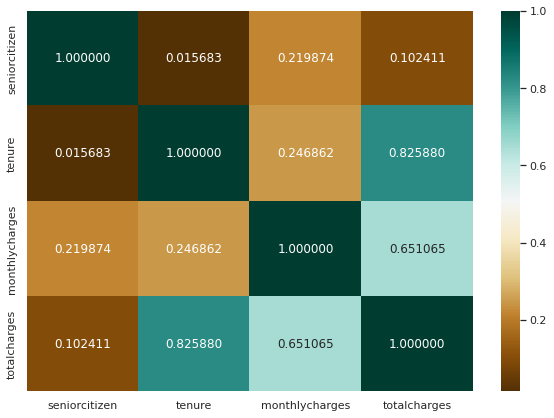

In [ ]:
# Multivariate analysis
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, fmt='2f', cmap='BrBG')
# ANALYSIS
# a. tot_service and monthlycharges, as well as tot_service and totalcharges have strong correlation which is reasonable
# b. totalcharges and tenure also has pretty high correlation
# c. interestingly, churn has negative and mild correlation with tenure

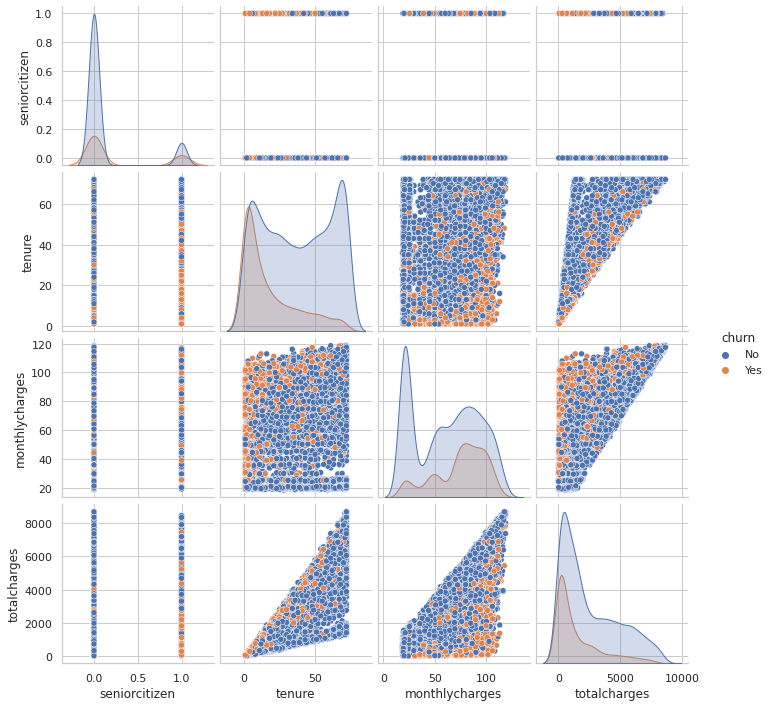

In [ ]:
sns.pairplot(df, hue='churn')
# ANALYSIS
# a. I used churn as the hue parameter, to explains the reasons people stop using the service
# b. It seems customers who stop using the service are likely to be a senior citizen with relatively short years of working, and relatively high bills

## Preparing Data for ML

In [ ]:
df=df.drop(columns='customerid')

In [ ]:
#Generate Total Service
df['total_service'] = (df[['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
                           'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']] == 'Yes').sum(axis=1)

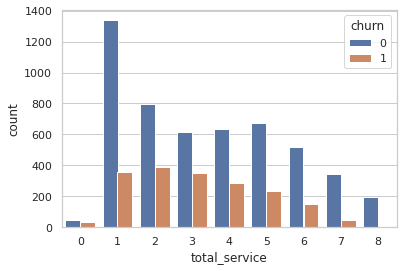

In [ ]:
sns.countplot(data=df, x='total_service', hue='churn')
# it seems there is association of churn and one additional service

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['total_service'].value_counts()

1    1697
2    1186
3     965
4     921
5     906
6     674
7     395
8     208
0      80
Name: total_service, dtype: int64

### Encoding

We are going to encoding partner and dependents using label encoding

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,total_service
0,Female,0,1,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,0,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,Male,0,0,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
3,Male,0,0,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,0,0,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
df['partner']= label.fit_transform(df['partner']) 
df['dependents']= label.fit_transform(df['dependents']) 
df['churn']= label.fit_transform(df['churn']) 
df['phoneservice']= label.fit_transform(df['phoneservice']) 
df['paperlessbilling']= label.fit_transform(df['paperlessbilling']) 
df['gender']= label.fit_transform(df['gender']) 
print(df['partner'].unique())


[1 0]


In [ ]:
demography=['partner', 'dependents', 'churn', 'phoneservice', 'paperlessbilling']
def label_encoding(demography):
  for i in demography:
    df[i] =df[i].map({'Yes':1, 'No':0})
    return

label_encoding(['partner', 'dependents', 'churn', 'phoneservice', 'paperlessbilling'])

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,total_service
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,1,0,0,0,34,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,3
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,3
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,3
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [ ]:
ohe = ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
       'streamingtv', 'streamingmovies', 'contract', 'paymentmethod']

df=pd.get_dummies(df, columns=ohe)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   seniorcitizen                            7032 non-null   int64  
 2   partner                                  7032 non-null   int64  
 3   dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   phoneservice                             7032 non-null   int64  
 6   paperlessbilling                         7032 non-null   int64  
 7   monthlycharges                           7032 non-null   float64
 8   totalcharges                             7032 non-null   float64
 9   churn                                    7032 non-null   int64  
 10  total_service                            7032 no

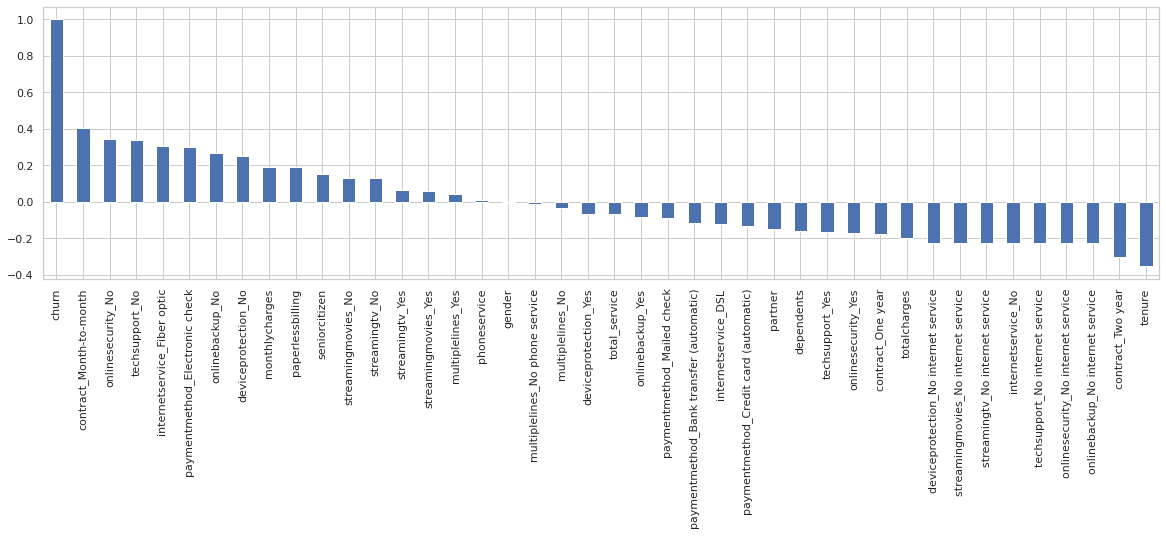

In [ ]:
plt.figure(figsize=(16,10))
df.corr()['churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))
# having a contract in monthly basis seems to be positively correlated with churn
# in contrast, tenure and having a two year contracts correlated negatively to churn

### Rescaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit_transform(df[['tenure']])
min_max_scaler.fit_transform(df[['monthlycharges']])
min_max_scaler.fit_transform(df[['totalcharges']])

array([[0.0012751 ],
       [0.21586661],
       [0.01031041],
       ...,
       [0.03780868],
       [0.03321025],
       [0.78764136]])

### Data Split

In [ ]:
# SPLIT DATA HERE
from sklearn.model_selection import train_test_split

feature = df.drop(columns='churn')
target = df[['churn']]

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.20)

## Machine Learning

In [ ]:
from sklearn.metrics import

### KNN 

In [ ]:
# FIT TRAINIng
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict
y_pred_knn = knn.predict(x_test)
y_pred_knn_prob=knn.predict_proba(x_test)

In [ ]:
# Since the data is not balance, we cannot use accuracy. Instead, use Precision, Recall, F1 score, AUC, or ROC
print('Confusion Matrix ',confusion_matrix(y_test, y_pred_knn))
# calculate AUC
print('AUC ',roc_auc_score(y_test, y_pred_knn))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, y_pred_knn))
# calculate Precision
print('Precision ',precision_score(y_test, y_pred_knn))
# calculate Recall
print('Recall ',recall_score(y_test, y_pred_knn))

Confusion Matrix  [[897 131]
 [200 179]]
AUC  0.6724318039485437
F1 Score  0.5195936139332367
Precision  0.5774193548387097
Recall  0.47229551451187335


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1028
           1       0.58      0.47      0.52       379

    accuracy                           0.76      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



### Logistic Regression

In [ ]:
# Fit Training
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
print(logreg.coef_, logreg.intercept_)

[[-2.36558874e-02  1.99423013e-01 -2.96279180e-02 -2.03095863e-01
  -6.40002849e-02 -2.29931096e-01  2.85214478e-01  1.29005220e-02
   3.45473869e-04 -2.36587554e-01 -3.55882779e-01  9.37092891e-02
   1.25951683e-01 -2.05883012e-01  1.71750053e-01 -1.02088848e-01
   1.80035718e-01 -1.02088848e-01 -2.14168677e-01 -4.94401756e-04
  -1.02088848e-01 -3.36385572e-02 -6.12868636e-02 -1.02088848e-01
   2.71539046e-02  1.57448993e-01 -1.02088848e-01 -1.91581952e-01
  -1.62893062e-01 -1.02088848e-01  1.28760103e-01 -1.84999997e-01
  -1.02088848e-01  1.50867038e-01  3.41770564e-01 -1.85254314e-01
  -2.92738057e-01 -6.27351567e-02 -1.47327846e-01  3.13327910e-01
  -2.39486714e-01]] [-0.13691941]


In [ ]:
# Predict
y_pred_reg = logreg.predict(x_test)
y_pred_reg

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
# Since the data is not balance, we cannot use accuracy. Instead, use Precision, Recall, F1 score, AUC, or ROC
print('Confusion Matrix ',confusion_matrix(y_test, y_pred_reg))
# calculate AUC
print('AUC ',roc_auc_score(y_test, y_pred_reg))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, y_pred_reg))
# calculate Precision
print('Precision ',precision_score(y_test, y_pred_reg))
# calculate Recall
print('Recall ',recall_score(y_test, y_pred_reg))

Confusion Matrix  [[924 104]
 [175 204]]
AUC  0.7185456300113959
F1 Score  0.593886462882096
Precision  0.6623376623376623
Recall  0.5382585751978892


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

print(metrics.classification_report(y_test, y_pred_reg))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1028
           1       0.66      0.54      0.59       379

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



### Decision Tree

In [ ]:
# FIT TRAINING
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# Since the data is not balance, we cannot use accuracy. Instead, use Precision, Recall, F1 score, AUC, or ROC
print('Confusion Matrix ',confusion_matrix(y_test, y_pred_dt))
# calculate AUC
print('AUC ',roc_auc_score(y_test, y_pred_dt))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, y_pred_dt))
# calculate Precision
print('Precision ',precision_score(y_test, y_pred_dt))
# calculate Recall
print('Recall ',recall_score(y_test, y_pred_dt))

Confusion Matrix  [[812 216]
 [183 196]]
AUC  0.6535168321304271
F1 Score  0.49557522123893805
Precision  0.47572815533980584
Recall  0.5171503957783641


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1028
           1       0.48      0.52      0.50       379

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407



### Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

In [ ]:
# Since the data is not balance, we cannot use accuracy. Instead, use Precision, Recall, F1 score, AUC, or ROC
print('Confusion Matrix ',confusion_matrix(y_test, y_pred_rf))
# calculate AUC
print('AUC ',roc_auc_score(y_test, y_pred_rf))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, y_pred_rf))
# calculate Precision
print('Precision ',precision_score(y_test, y_pred_rf))
# calculate Recall
print('Recall ',recall_score(y_test, y_pred_rf))

Confusion Matrix  [[915 113]
 [195 184]]
AUC  0.6877829738303748
F1 Score  0.5443786982248521
Precision  0.6195286195286195
Recall  0.48548812664907653


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1028
           1       0.62      0.49      0.54       379

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## Which model is the best?

Based on the evaluation metrics, Log Regression has the best evaluation metrcis. The value for AUC, F1, Precission, and Recall are the highest of all models.

F1 is considered to be the best metric for imbalance data. The F1 score for logistic regression is the highest among other models, which is 0.59 while the other models KNN(0.51), Decision Tree (0.49), and Random Forest (0.54)

However, F1 scores are not much above 50%. Another step should be taken to explore which model is the best, one of it by trying to balance the data.

**END**